### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

### Lendo o dataset

In [2]:
crop = pd.read_csv('Crop_recommendation.csv')
crop.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### Processando os dados

In [3]:
crop.shape

(2200, 8)

In [4]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
crop.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [6]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
crop.isna()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


### Analisando o dataset

<Axes: xlabel='label', ylabel='count'>

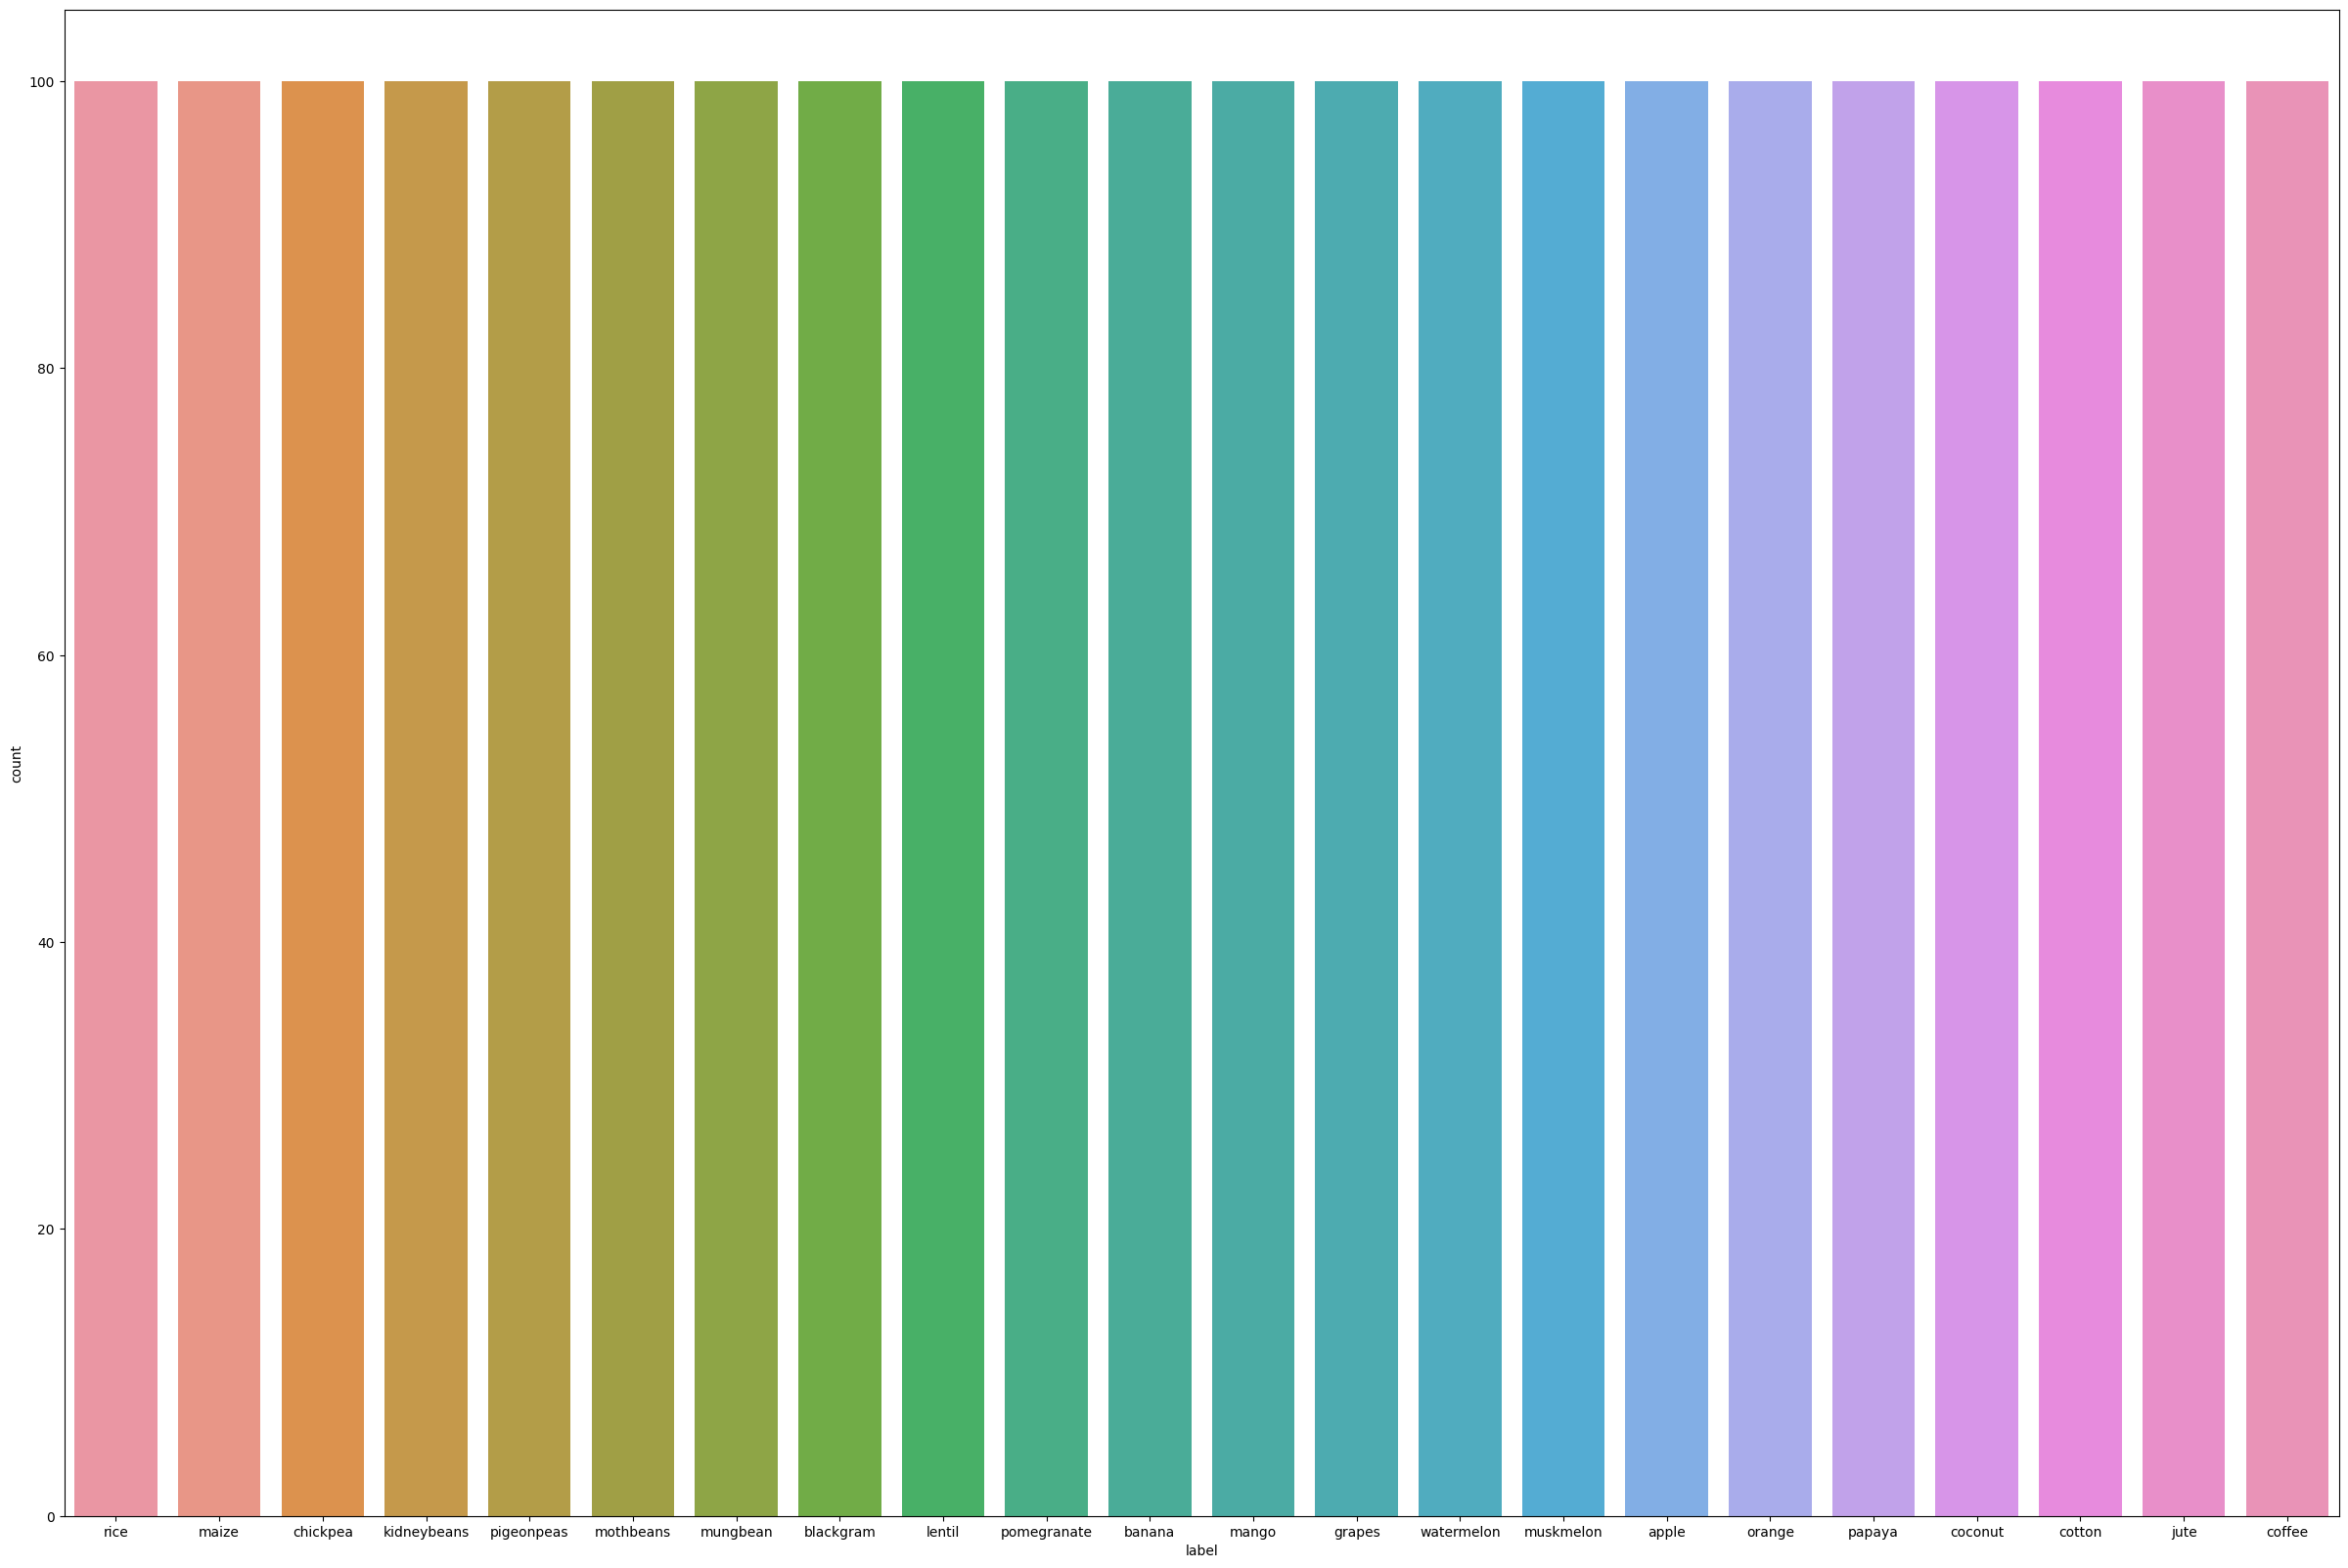

In [11]:
plt.figure(figsize=(30,20))
sns.countplot(x='label', data = crop)

<Axes: xlabel='label', ylabel='temperature'>

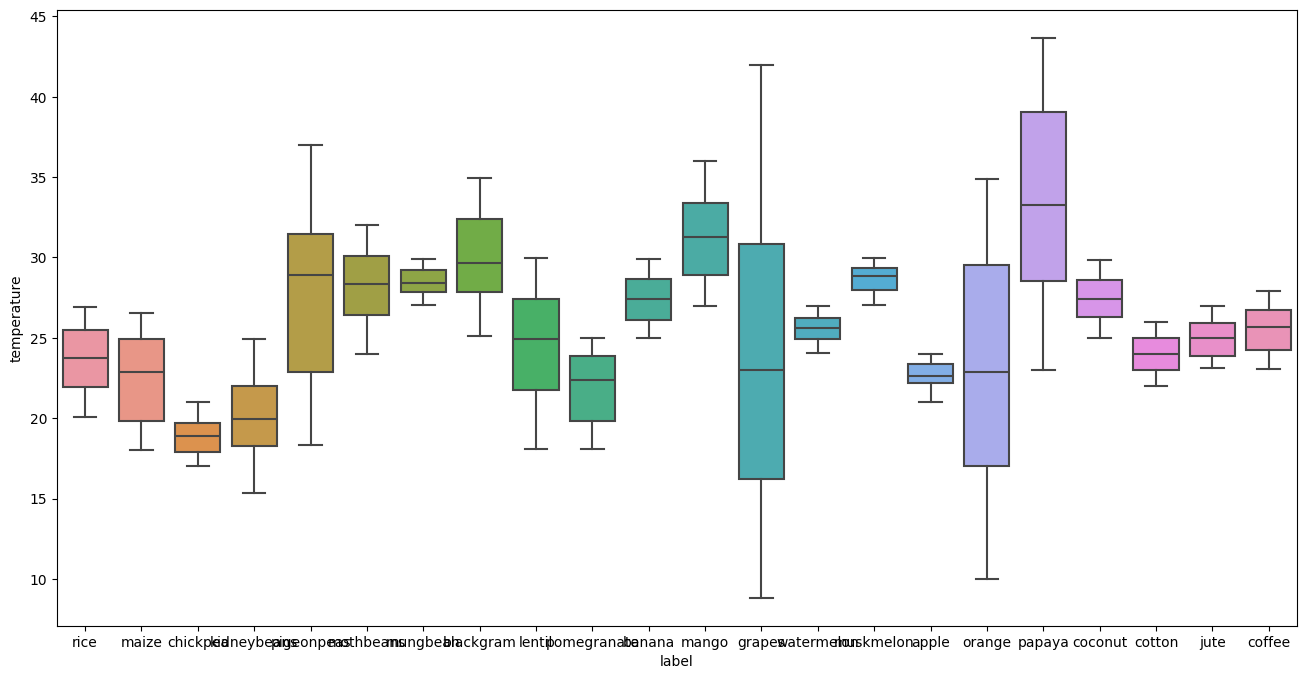

In [14]:
plt.figure(figsize=(16,8))
sns.boxplot(y = crop['temperature'], x = crop['label'])

<Axes: xlabel='label', ylabel='humidity'>

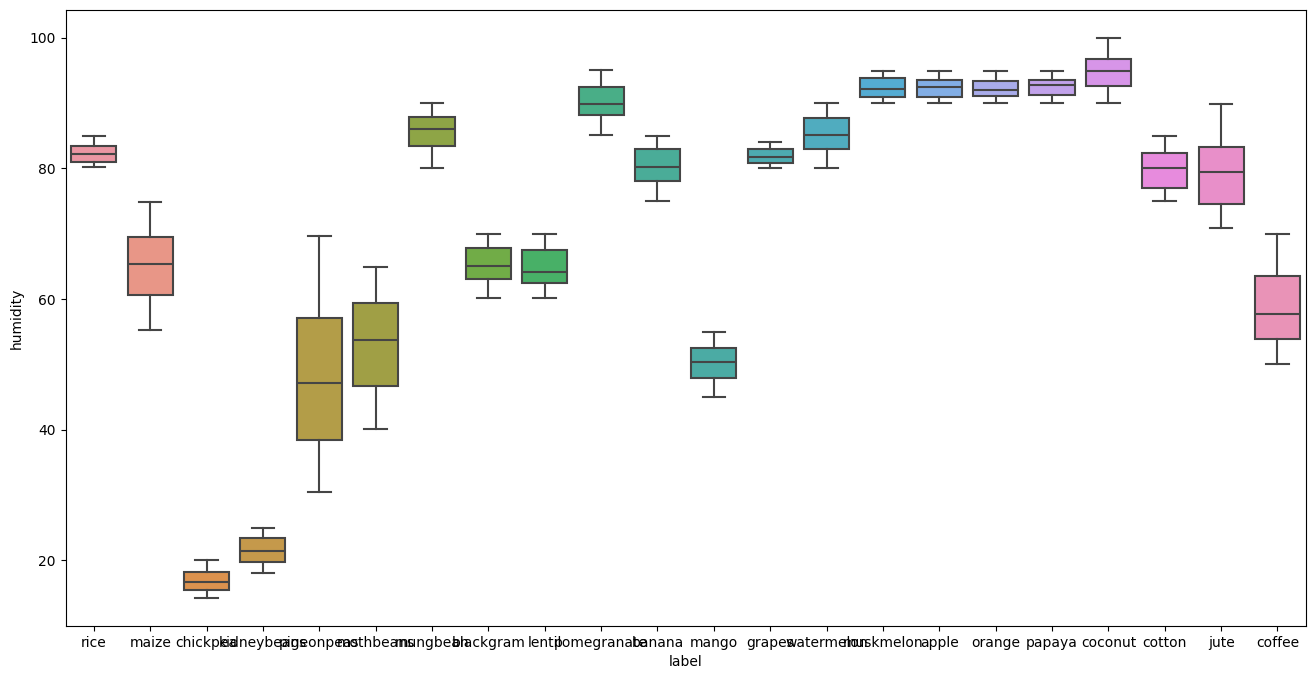

In [15]:
plt.figure(figsize=(16,8))
sns.boxplot(y = crop['humidity'], x = crop['label'])

<Axes: xlabel='label', ylabel='ph'>

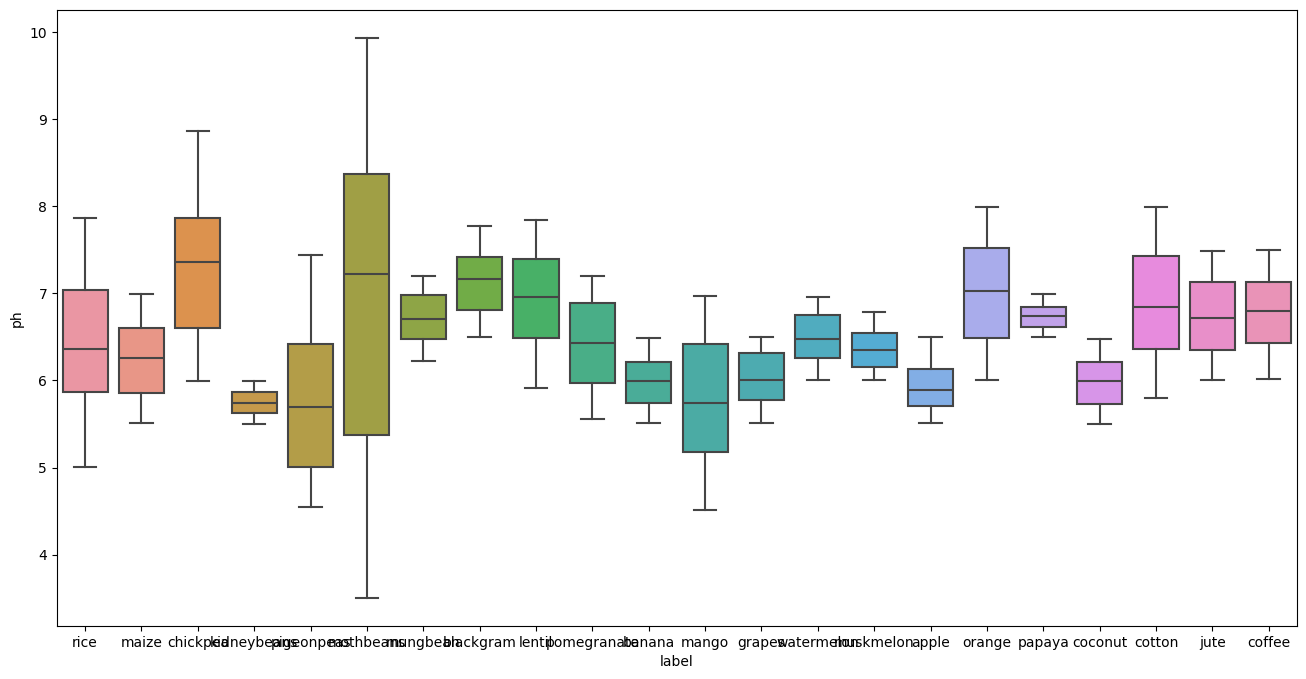

In [16]:
plt.figure(figsize=(16,8))
sns.boxplot(y = crop['ph'], x = crop['label'])

<Axes: xlabel='label', ylabel='rainfall'>

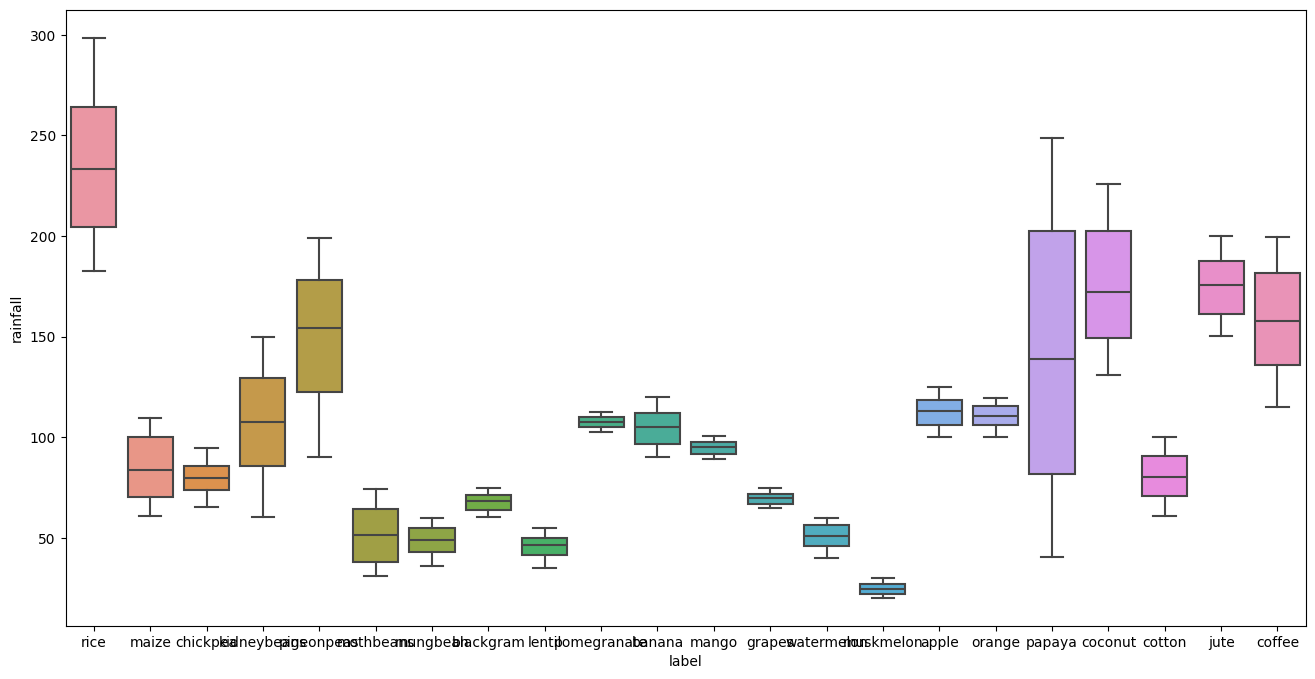

In [17]:
plt.figure(figsize=(16,8))
sns.boxplot(y = crop['rainfall'], x = crop['label'])

<Axes: xlabel='label', ylabel='N'>

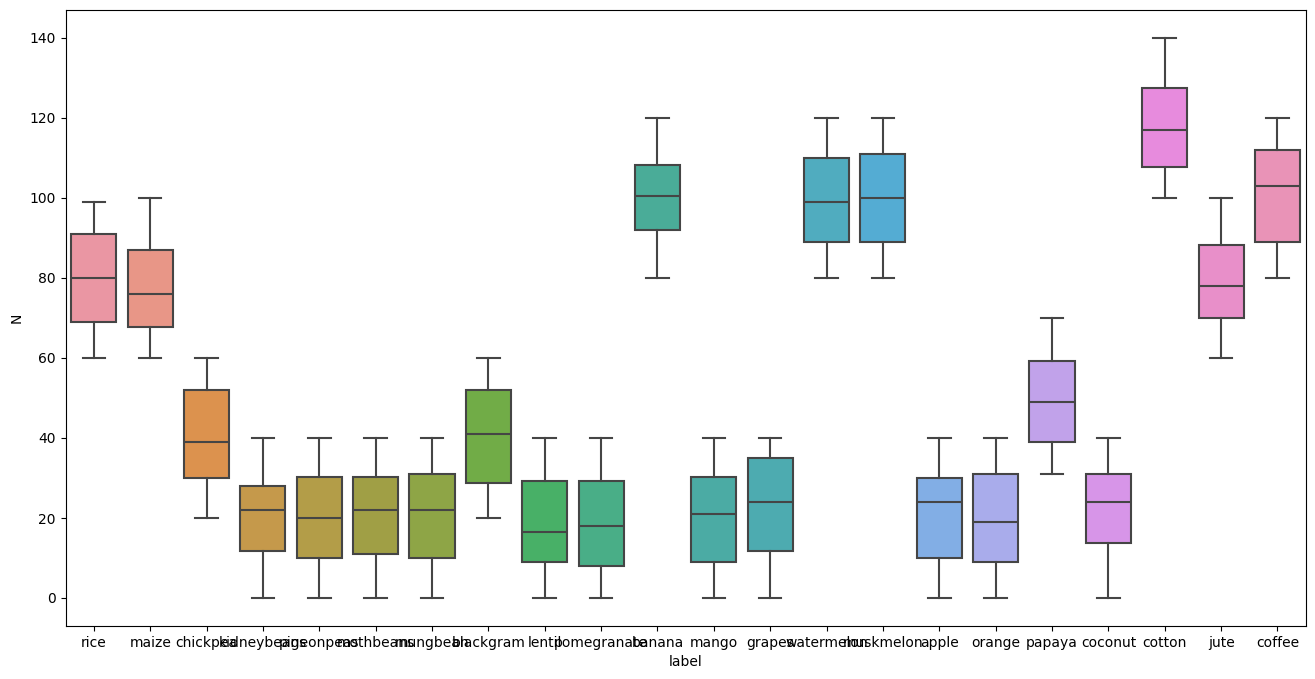

In [20]:
plt.figure(figsize=(16,8))
sns.boxplot(y = crop['N'], x = crop['label'])

<Axes: xlabel='label', ylabel='P'>

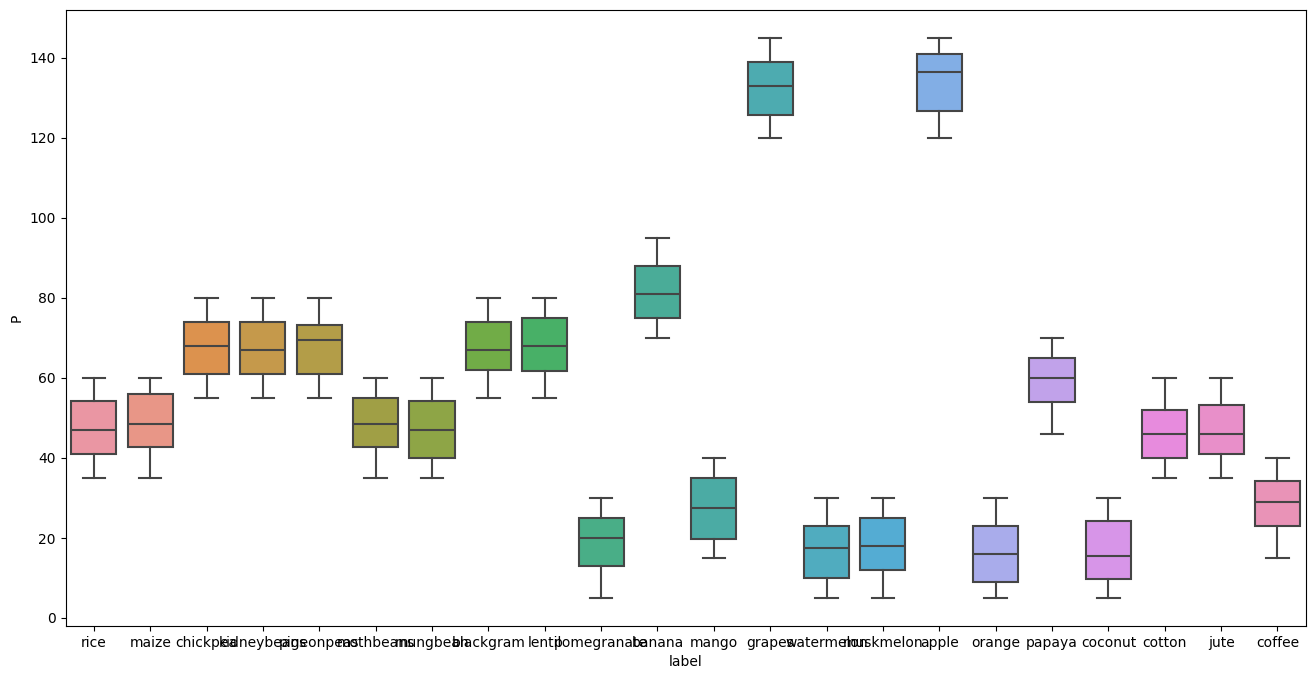

In [21]:
plt.figure(figsize=(16,8))
sns.boxplot(y = crop['P'], x = crop['label'])

<Axes: xlabel='label', ylabel='K'>

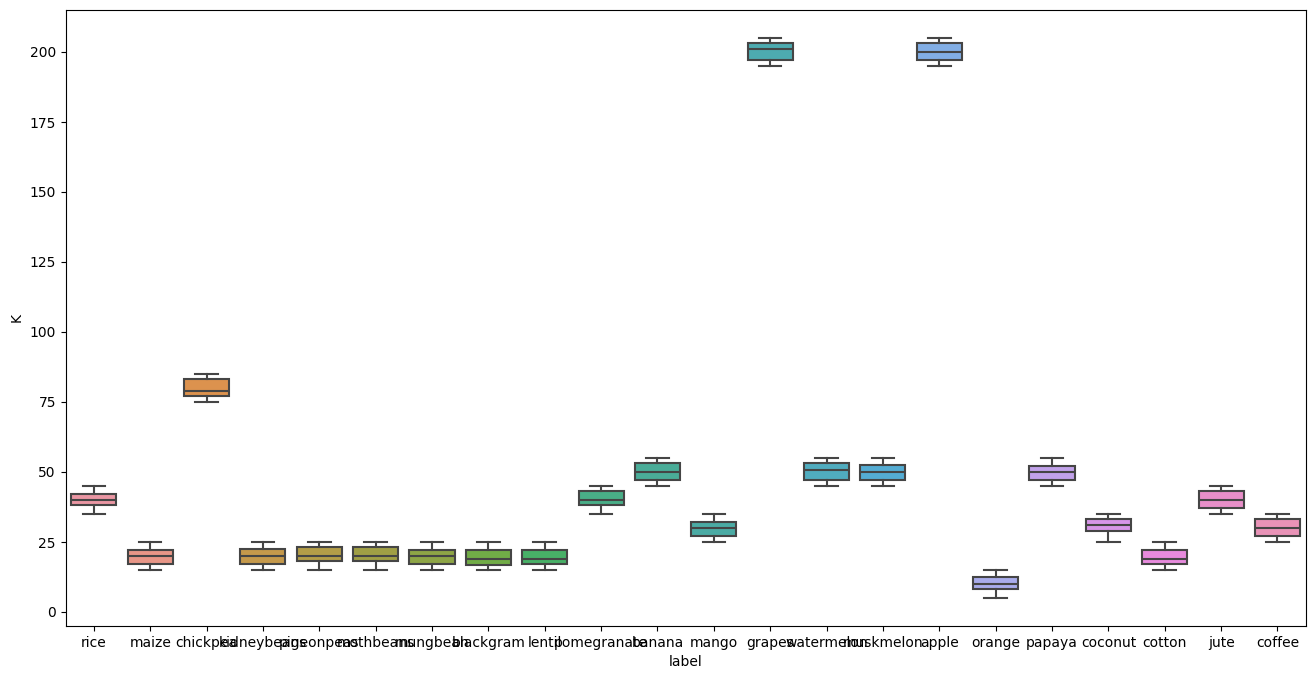

In [22]:
plt.figure(figsize=(16,8))
sns.boxplot(y = crop['K'], x = crop['label'])

### Escolhendo Features e Label Encoder

In [57]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
crop['label'] = label_encoder.fit_transform(crop['label'])

crop['label'].unique()


array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [59]:
features = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']

In [60]:
acc = []
model = []

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

### Modelos de aloritmos de classificação

- KNeighbors Classifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN precisão: ", x)

print(classification_report(y_test,predicted_values))

KNN precisão:  0.975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        18
           8       0.89      0.86      0.87        28
           9       0.93      1.00      0.97        14
          10       0.96      1.00      0.98        23
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        26
          13       1.00      0.89      0.94        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
      

In [64]:
score = cross_val_score(knn,features,target,cv=5)
print('Cross validation: ',score)

Cross validation:  [0.97727273 0.98181818 0.97954545 0.97954545 0.97954545]


In [65]:
# Precisão do treino
knn_train_accuracy = knn.score(x_train,y_train)
print("Precisão do treino:",knn.score(x_train,y_train))
# Precisão do teste
knn_test_accuracy = knn.score(x_test,y_test)
print("Precisão do teste:",knn.score(x_test,y_test))

Precisão do treino: 0.9886363636363636
Precisão do teste: 0.975


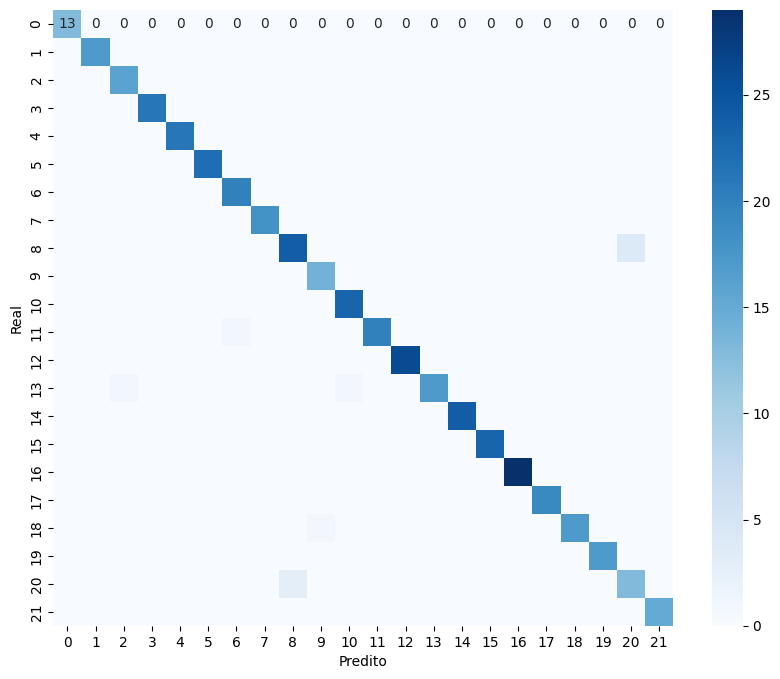

In [66]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_values)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

### Hiper-parâmetros para o KNN

In [67]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [12,13,14,15,16,17,18],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [68]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}

In [69]:
g_res.best_score_

0.9789756440743992

### Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(x_train,y_train)

predicted_values = DT.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree precisão: ", x*100)

print(classification_report(y_test,predicted_values))

Decision Tree precisão:  90.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.59      1.00      0.74        16
           3       1.00      1.00      1.00        21
           4       0.91      1.00      0.95        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.74      0.93      0.83        28
           9       0.00      0.00      0.00        14
          10       0.68      1.00      0.81        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       0.00      0.00      0.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        

In [71]:
score = cross_val_score(DT, features, target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]


In [72]:
#Treino
dt_train_accuracy = DT.score(x_train,y_train)
print("Precisão do treino:",DT.score(x_train,y_train))
#Teste
dt_test_accuracy = DT.score(x_test,y_test)
print("Precisão do teste:",DT.score(x_test,y_test))

Precisão do treino: 0.8818181818181818
Precisão do teste: 0.9


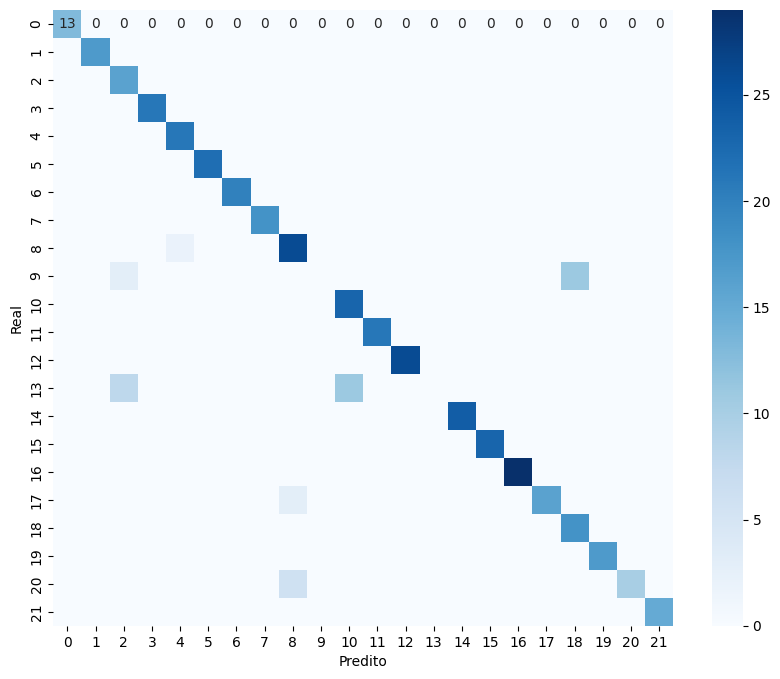

In [73]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_values)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest precisão: ", x)

print(classification_report(y_test,predicted_values))

Random Forest precisão:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.90      1.00      0.95        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00     

In [75]:
score = cross_val_score(RF,features,target,cv=5)
print('Cross validation: ',score)

Cross validation:  [0.99772727 0.99545455 0.99772727 0.99318182 0.98863636]


In [76]:
#Treino
rf_train_accuracy = RF.score(x_train,y_train)
print("Precisão do treino:",RF.score(x_train,y_train))
#Teste
rf_test_accuracy = RF.score(x_test,y_test)
print("Precisão do teste:",RF.score(x_test,y_test))

Precisão do treino: 1.0
Precisão do teste: 0.990909090909091


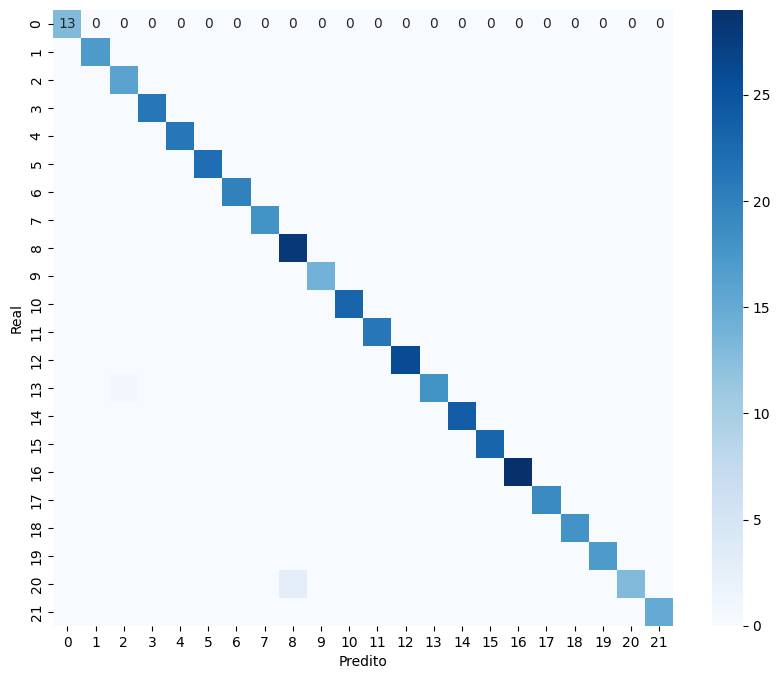

In [77]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_values)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

### Navis Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes precisao: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes precisao:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.88      1.00      0.93        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1

In [79]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
print('Cross validation: ',score)

Cross validation:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]


In [80]:
nb_train_accuracy = NaiveBayes.score(x_train,y_train)
print("Precisão do treino:",NaiveBayes.score(x_train,y_train))
nb_test_accuracy = NaiveBayes.score(x_test,y_test)
print("Precisão do teste:",NaiveBayes.score(x_test,y_test))

Precisão do treino: 0.9960227272727272
Precisão do teste: 0.990909090909091


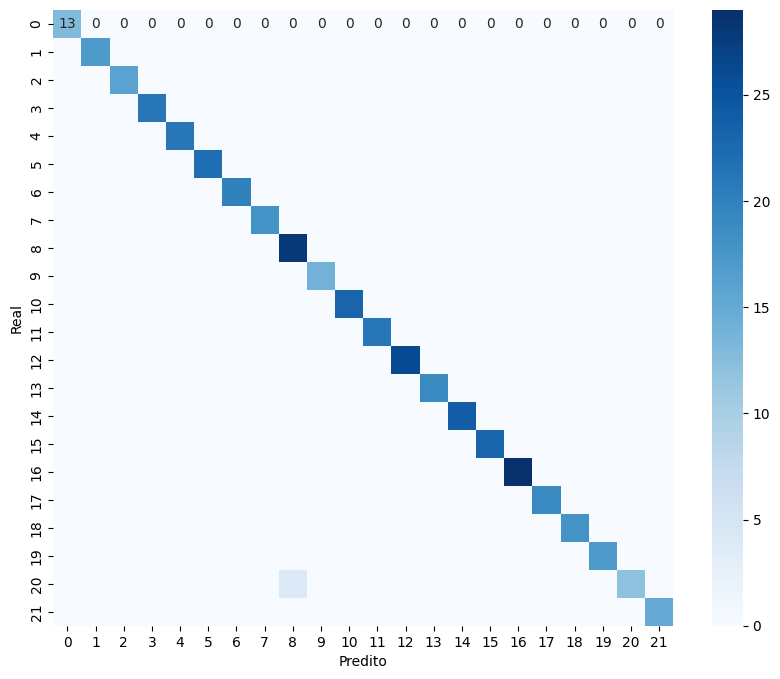

In [81]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_values)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

### XGBoost

In [82]:
import xgboost as xgb
xb = xgb.XGBClassifier()
xb.fit(x_train,y_train)

predicted_values = xb.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values);
acc.append(x)
model.append('XGBoost')
print("XGBoost precisão: ", x)

print(classification_report(y_test,predicted_values))

XGBoost precisão:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      0.96      0.95        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00 

In [85]:
score = cross_val_score(xb,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99545455 0.98863636 0.99545455 0.99545455 0.98863636]


In [86]:
XB_train_accuracy = xb.score(x_train,y_train)
print("Precisão do treino:",xb.score(x_train,y_train))

XB_test_accuracy = xb.score(x_test,y_test)
print("Precisão do teste:",xb.score(x_test,y_test))

Precisão do treino: 1.0
Precisão do teste: 0.990909090909091


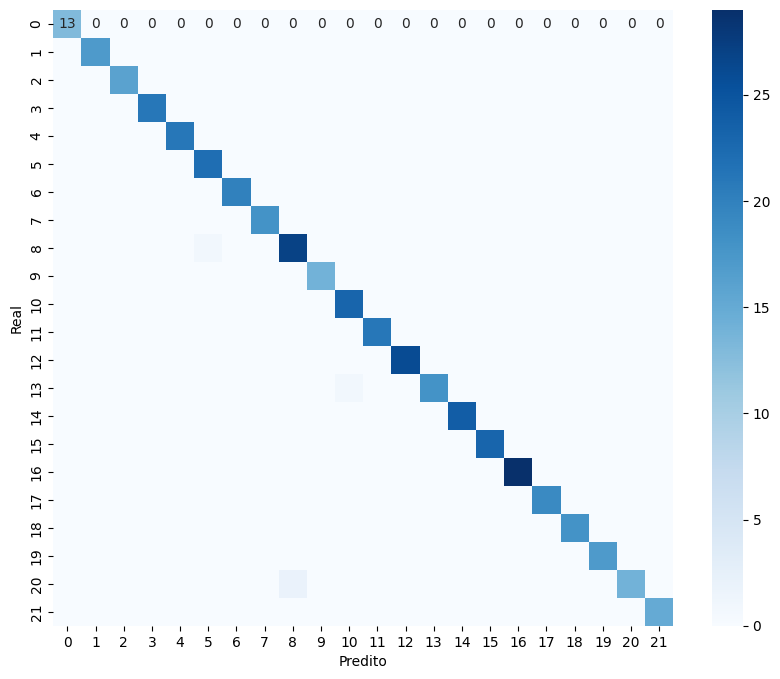

In [87]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_values)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

### Comparação entre os modelos

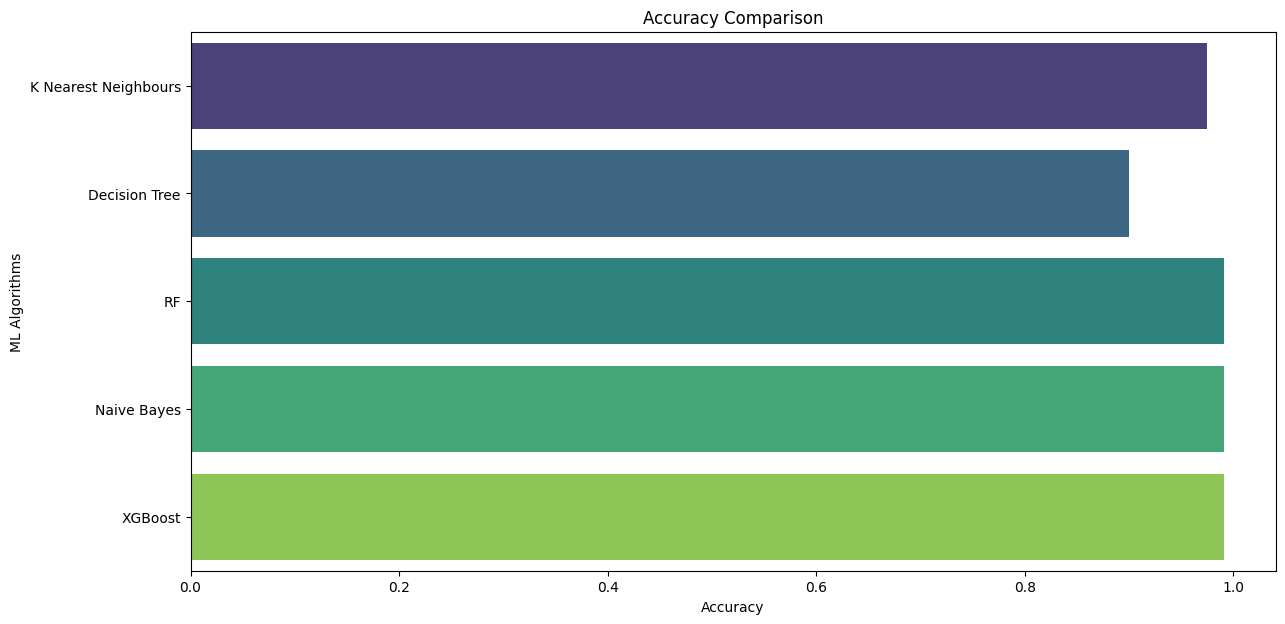

In [88]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

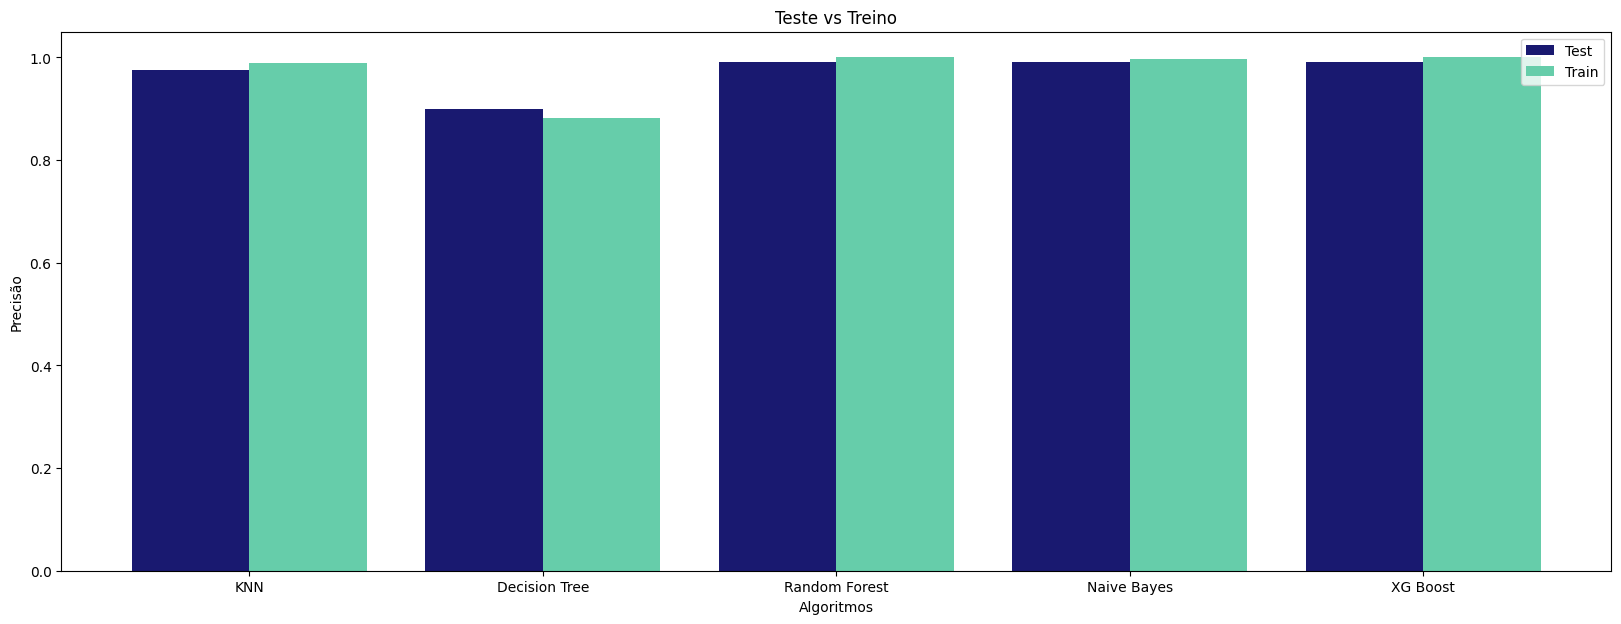

In [89]:
label = ['KNN', 'Decision Tree','Random Forest','Naive Bayes','XG Boost']
Test = [knn_test_accuracy, dt_test_accuracy,rf_test_accuracy,
        nb_test_accuracy, XB_test_accuracy]
Train = [knn_train_accuracy,  dt_train_accuracy, rf_train_accuracy,
         nb_train_accuracy, XB_train_accuracy]

f, ax = plt.subplots(figsize=(20,7))
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, label)
plt.xlabel("Algoritmos")
plt.ylabel("Precisão")
plt.title("Teste vs Treino")
plt.legend()
plt.show()

Analisando os gráficos fica fácil de perceber que o Naive Bayes foi o que teve a melhor precisão <br>
Porém, quando um algoritmo atinge 100% de precisão, é necessário desconfiar <br>
Pois é incomum e pode significar algum erro ou falta de dados para comparação <br>

In [ ]:
import pickle
pickle_out = open('classifier_crop.pkl','wb')
pickle.dump(model[0],pickle_out)
pickle_out.close()